# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Starting Data Retrieval         ")
print("--------------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"

City_Data = []

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = f"{url}&q={city}"
    
    print(f"processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
        
        time.sleep(2)
        
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        maxtemp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]
        
        City_Data.append({"City": city,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": maxtemp,
                         "Humidity": humidity,
                         "Cloudiness": clouds,
                         "Wind Speed": wind,
                         "Country": country,
                         "Date": date})
    except:
        print(f"{city} error... skipping")
        pass
    
print("--------------------------------")
print("Loading Complete                ")

Starting Data Retrieval         
--------------------------------
processing city #1 in group #1 | mataura
processing city #2 in group #1 | belushya guba
belushya guba error... skipping
processing city #3 in group #1 | mahebourg
processing city #4 in group #1 | bluff
processing city #5 in group #1 | constanza
processing city #6 in group #1 | vaini
processing city #7 in group #1 | new norfolk
processing city #8 in group #1 | taolanaro
taolanaro error... skipping
processing city #9 in group #1 | georgetown
processing city #10 in group #1 | rikitea
processing city #11 in group #1 | husavik
processing city #12 in group #1 | puerto ayora
processing city #13 in group #1 | rudnichnyy
processing city #14 in group #1 | punta arenas
processing city #15 in group #1 | halalo
halalo error... skipping
processing city #16 in group #1 | liverpool
processing city #17 in group #1 | ushuaia
processing city #18 in group #1 | werda
processing city #19 in group #1 | saint george
processing city #20 in group

processing city #28 in group #4 | bayan
processing city #29 in group #4 | okha
processing city #30 in group #4 | jamestown
processing city #31 in group #4 | anadyr
processing city #32 in group #4 | porto torres
processing city #33 in group #4 | halifax
processing city #34 in group #4 | kamina
processing city #35 in group #4 | torbay
processing city #36 in group #4 | shaowu
processing city #37 in group #4 | port elizabeth
processing city #38 in group #4 | horsham
processing city #39 in group #4 | sao joao da barra
processing city #40 in group #4 | kloulklubed
processing city #41 in group #4 | thinadhoo
processing city #42 in group #4 | sabang
processing city #43 in group #4 | broken hill
processing city #44 in group #4 | samusu
samusu error... skipping
processing city #45 in group #4 | shieli
processing city #46 in group #4 | novobiryusinskiy
processing city #47 in group #4 | illoqqortoormiut
illoqqortoormiut error... skipping
processing city #48 in group #4 | iwanai
processing city #49

processing city #6 in group #8 | sydney mines
processing city #7 in group #8 | laviana
processing city #8 in group #8 | sao filipe
processing city #9 in group #8 | cocachacra
processing city #10 in group #8 | alto baudo
alto baudo error... skipping
processing city #11 in group #8 | taoudenni
processing city #12 in group #8 | bitung
processing city #13 in group #8 | thompson
processing city #14 in group #8 | iqaluit
processing city #15 in group #8 | tamandare
processing city #16 in group #8 | dingle
processing city #17 in group #8 | codrington
processing city #18 in group #8 | krasnoarmeysk
processing city #19 in group #8 | armacao dos buzios
armacao dos buzios error... skipping
processing city #20 in group #8 | thai nguyen
processing city #21 in group #8 | jardim
processing city #22 in group #8 | port lincoln
processing city #23 in group #8 | union de tula
processing city #24 in group #8 | ukiah
processing city #25 in group #8 | kitimat
processing city #26 in group #8 | den helder
proc

processing city #34 in group #11 | usoke
processing city #35 in group #11 | deniliquin
processing city #36 in group #11 | vila franca do campo
processing city #37 in group #11 | bathsheba
processing city #38 in group #11 | russell
processing city #39 in group #11 | saint-augustin
processing city #40 in group #11 | petropavlovsk-kamchatskiy
processing city #41 in group #11 | vila do maio
processing city #42 in group #11 | bereda
processing city #43 in group #11 | yaan
processing city #44 in group #11 | askiz
processing city #45 in group #11 | sola
processing city #46 in group #11 | maceio
processing city #47 in group #11 | caxito
processing city #48 in group #11 | maroantsetra
processing city #49 in group #11 | tarhunah
tarhunah error... skipping
processing city #50 in group #11 | wainwright
processing city #1 in group #12 | berdigestyakh
processing city #2 in group #12 | comodoro rivadavia
processing city #3 in group #12 | popova
processing city #4 in group #12 | el alto
processing cit

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(City_Data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,72.48,59,90,5.86,NZ,1643599874
1,mahebourg,-20.4081,57.7000,81.25,94,75,9.22,MU,1643599605
2,bluff,-46.6000,168.3333,72.81,83,95,2.13,NZ,1643599880
3,constanza,47.6603,9.1758,38.53,88,100,1.01,DE,1643599883
4,vaini,-21.2000,-175.2000,81.54,69,100,14.74,TO,1643599849


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [5]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,22.885904,17.721344,48.160445,73.551020,58.573284,7.902412,1.643601e+09
std,32.662546,92.019060,30.693362,19.754033,40.186735,6.028347,4.064855e+02
min,-54.800000,-179.166700,-28.970000,13.000000,0.000000,0.000000,1.643599e+09
25%,-3.491700,-61.293650,25.980000,65.000000,16.000000,3.440000,1.643600e+09
50%,28.583300,23.283300,55.400000,76.000000,75.000000,6.350000,1.643601e+09
75%,50.656250,98.003800,74.680000,88.000000,100.000000,10.970000,1.643601e+09
max,78.218600,179.316700,100.450000,100.000000,100.000000,35.590000,1.643601e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
dirty_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_data)

Int64Index([], dtype='int64')


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [11]:
clean_data = city_data_pd.drop(dirty_data, inplace=False)
clean_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,72.48,59,90,5.86,NZ,1643599874
1,mahebourg,-20.4081,57.7000,81.25,94,75,9.22,MU,1643599605
2,bluff,-46.6000,168.3333,72.81,83,95,2.13,NZ,1643599880
3,constanza,47.6603,9.1758,38.53,88,100,1.01,DE,1643599883
4,vaini,-21.2000,-175.2000,81.54,69,100,14.74,TO,1643599849


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [15]:
#relevant fields
lats = clean_data["Lat"]
max_temps = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]

clean_data.to_csv(output_data_file, index_label= "City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

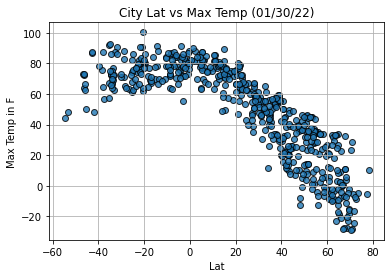

In [19]:
plt.scatter(lats, max_temps, edgecolor = "black", linewidths=1, marker="o", alpha=.8, label="Cities")

plt.title("City Lat vs Max Temp (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp in F")
plt.xlabel("Lat")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

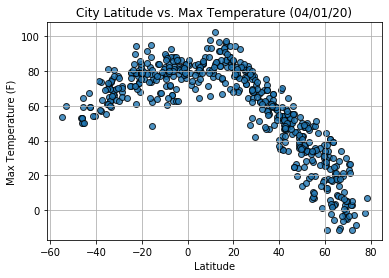

## Latitude vs. Humidity Plot

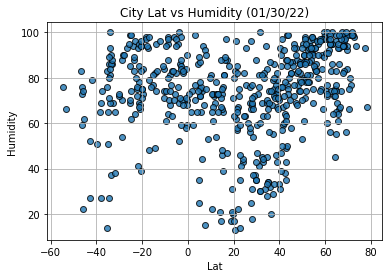

In [20]:
plt.scatter(lats, humidity, edgecolor = "black", linewidths=1, marker="o", alpha=.8, label="Cities")

plt.title("City Lat vs Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

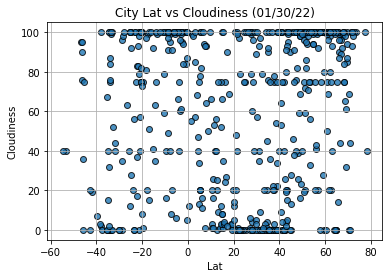

In [21]:
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths=1, marker="o", alpha=.8, label="Cities")

plt.title("City Lat vs Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

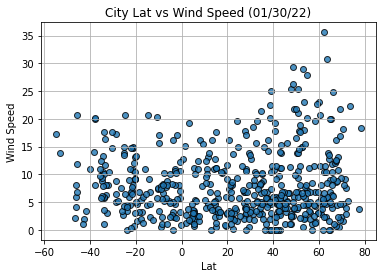

In [22]:
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths=1, marker="o", alpha=.8, label="Cities")

plt.title("City Lat vs Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [26]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
N_hem_df = clean_data.loc[(clean_data["Lat"] >= 0)]
S_hem_df = clean_data.loc[(clean_data["Lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7863599807447816


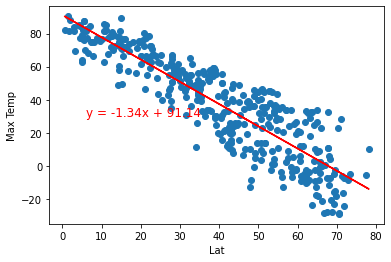

In [28]:
x_values = N_hem_df["Lat"]
y_values = N_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

There is a strong coorlation between Max Temp and Latitude in the northern Hemisphere. As you get closer to the north pole, the temperature decreases and as we move away from the northpole the tempature rises. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.1136987871554222


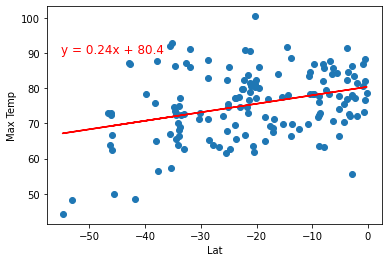

In [30]:
x_values = S_hem_df["Lat"]
y_values = S_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18084971581810177


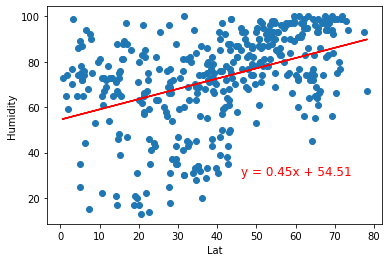

In [35]:
x_values = N_hem_df["Lat"]
y_values = N_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (46,30))

There is little cooralation between Humidity in the Northern Hemisphere and Latitudes. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1136987871554222


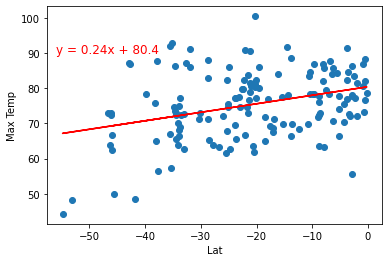

In [36]:
x_values = S_hem_df["Lat"]
y_values = S_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-56,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1250690081591294


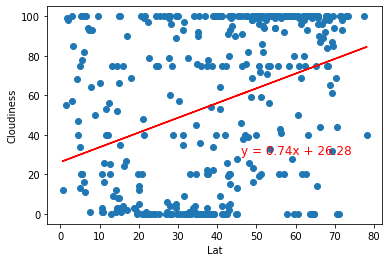

In [39]:
x_values = N_hem_df["Lat"]
y_values = N_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (46,30))

There is little coorilation between Lat and cloudiness in the Nothern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14104259120661072


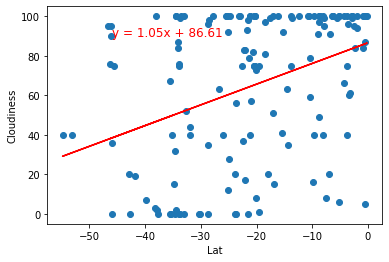

In [41]:
x_values = S_hem_df["Lat"]
y_values = S_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-46,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02308428788193124


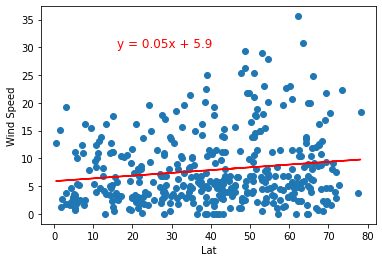

In [43]:
x_values = N_hem_df["Lat"]
y_values = N_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (16,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.045703246661004206


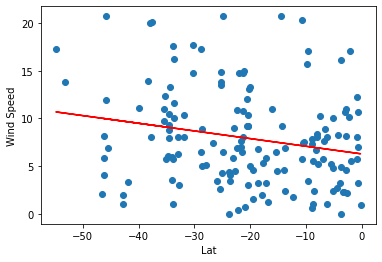

In [44]:
x_values = S_hem_df["Lat"]
y_values = S_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (46,30))